In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## 1. Data preprocessing

In [ ]:
tweets = pd.read_csv("tweets_keywords.csv")
tweets = tweets.dropna()
tweets.head(10)

FileNotFoundError: ignored

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8356 entries, 0 to 24317
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            8356 non-null   object
 1   username        8356 non-null   object
 2   Text            8356 non-null   object
 3   mentionedusers  8356 non-null   object
dtypes: object(4)
memory usage: 326.4+ KB


#### convert the date column to date and time

In [ ]:
date_list = []
time_list = []

for time in tweets['date']:
    txt = str(time)
    txt1 = txt.split("+")
    txt2 = txt1[0].split(" ")
    d = txt2[0]
    t = txt2[1]
    date_list.append(d)
    time_list.append(t)
    
print(date_list[0])
print(time_list[0])

2014-07-01
23:59:49


In [ ]:
tweets = tweets.drop(columns = ['date'])
tweets["date"] = date_list
tweets["time"] = time_list

tweets.head(10)

,username,Text,mentionedusers,date,time
0,Steve_DiMeglio,Sure hope no one calls out Arnold Palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49
3,stevenaumann,@antoniovilla9 @Znaumann1988 @Knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23
4,ChaseCYoung,@CoachJoshBrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03
5,TheAnnaRawson,Can't wait to see @BLAIRONEAL and @Harris_Engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40
6,daniellekang,"Thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54
9,TheAnnaRawson,Here ya go @ashleykmayo !! Next up @blaironeal...,"[User(username='AshleyKMayo', id=73263150, dis...",2014-07-01,23:07:29
12,Justaaaan_,I really want to challenge @OpTic_NaDeSHoT to ...,"[User(username='OpTic_Nadeshot', id=4376966655...",2014-07-01,22:55:48
14,SJHNatFan,@natalie_gulbis Morgan called you out for the ...,"[User(username='natalie_gulbis', id=18251618, ...",2014-07-01,22:49:08
15,NarzTastic,I got nominated by @thebritneyham todo the #ic...,"[User(username='thebritneyham', id=51966470, d...",2014-07-01,22:45:51
19,Keleigh13,@McIlroyRory I need someone to call you out on...,"[User(username='McIlroyRory', id=188039706, di...",2014-07-01,21:59:54


#### count posting dates

In [ ]:
tweets_count = tweets.groupby(['date'])['Text'].count().reset_index()
tweets_count = tweets_count.rename(columns={'Text': 'count'})
tweets_count

,date,count
0,2014-07-01,127
1,2014-07-15,156
2,2014-08-01,43
3,2014-08-15,1818
4,2014-09-01,1879
5,2014-09-15,1672
6,2014-10-01,884
7,2014-10-15,697
8,2014-11-01,287
9,2014-11-15,261


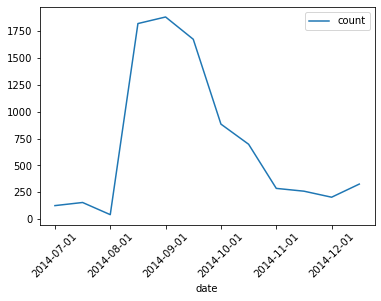

In [ ]:
# plt.figure(figsize=(30, 6), dpi=80)
tweets_count.plot(x ='date', y='count', kind = 'line')
# plt.xticks(tweets_count['date'])
plt.xticks(rotation=45)
plt.show()

√ tokenization 扒hashtag，根据hashtag做time analysis

√ ALS/donation/charity dictionary + 提及这些话题的tweets

√ sentiment



√ topic modeling

## Text Analysis

In [ ]:
import nltk, re
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist
from nltk import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import brown, stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# importing and customizing stop words
stop_words = stopwords.words('english')
stop_words.extend([',','.','!',':',';',')','(','*','&','/','@','http','Http','i','I','-','?',"'d","n't"])
wl = WordNetLemmatizer()

In [ ]:
# Tokenization
tokened = []
for i in tweets["Text"]:
    text = word_tokenize(i)
    text1 = [word for word in text if word not in stop_words]
    text_processed = []
    for word in text1:
        word1 = word.lower()
        word2 = wl.lemmatize(word1)
        text_processed.append(word2)
    tokened.append(text_processed)

In [ ]:
# tokenization 扒hashtag，根据hashtag做time analysis

### sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
SIA = SentimentIntensityAnalyzer()
tweets['scores'] = tweets['Text'].apply(lambda tweets: SIA.polarity_scores(tweets))

tweets['compound']  = tweets['scores'].apply(lambda score_dict: score_dict['compound'])
tweets['sentiment_type'] = tweets['compound'].apply(lambda c: "positive" if c>0 else ("neutral" if c==0 else "negative"))
# sent_type == 0: negative (compound < 0)
# sent_type == 1: neutral (compound = 0)
# sent_type == 2: positive (compound > 0)

tweets = tweets.drop(columns = ["scores"])
tweets.head(5)

,username,Text,mentionedusers,date,time,compound,sentiment_type
0,Steve_DiMeglio,Sure hope no one calls out Arnold Palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,0.6908,positive
3,stevenaumann,@antoniovilla9 @Znaumann1988 @Knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,0.2225,positive
4,ChaseCYoung,@CoachJoshBrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,0.1306,positive
5,TheAnnaRawson,Can't wait to see @BLAIRONEAL and @Harris_Engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,0.5526,positive
6,daniellekang,"Thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,0.4404,positive


### ALS/donation mentioning

In [ ]:
# import ALS and charity keywords defined by the group

dict_ALS = pd.read_csv("dict_ALS.csv")
dict_charity = pd.read_csv("dict_charity.csv")

print(dict_ALS.head(5),"\n")
print(dict_charity.head(5))

       keyword
0          als
1      disease
2  amyotrophic
3      lateral
4    sclerosis 

    keyword
0   charity
1    donate
2     money
3  donation
4    dollar


In [ ]:
# encode the mentions of ALS and charity
# mentioned = 1; unmentioned = 0

ALS_mention = []
charity_mention = []

for text in tokened:
    ALS_indicator = 0
    charity_indicator = 0
    
    for word in text:
        if any(word == dict_ALS["keyword"]):
            ALS_indicator += 1
        if any(word == dict_charity["keyword"]):
            charity_indicator += 1
            
    if ALS_indicator != 0:
        ALS_mention.append(1)
    else:
        ALS_mention.append(0)
        
    if charity_indicator != 0:
        charity_mention.append(1)
    else:
        charity_mention.append(0)

In [ ]:
tweets["ALS_mention"] = ALS_mention
tweets["charity_mention"] = charity_mention

tweets.head(5)

,username,Text,mentionedusers,date,time,compound,sentiment_type,ALS_mention,charity_mention
0,Steve_DiMeglio,Sure hope no one calls out Arnold Palmer with ...,"[User(username='Keegan_Bradley', id=225072440,...",2014-07-01,23:59:49,0.6908,positive,0,0
3,stevenaumann,@antoniovilla9 @Znaumann1988 @Knaumann93 ice b...,"[User(username='antoniovilla9', id=217621750, ...",2014-07-01,23:32:23,0.2225,positive,0,0
4,ChaseCYoung,@CoachJoshBrewer ice bucket challenge started ...,"[User(username='CoachJoshBrewer', id=51467210,...",2014-07-01,23:29:03,0.1306,positive,0,0
5,TheAnnaRawson,Can't wait to see @BLAIRONEAL and @Harris_Engl...,"[User(username='BLAIRONEAL', id=18517442, disp...",2014-07-01,23:23:40,0.5526,positive,0,1
6,daniellekang,"Thanks guys for the ""help"" 😂 @tygretzky @nicca...","[User(username='DC2forlife', id=83144062485528...",2014-07-01,23:17:54,0.4404,positive,0,0
